In [2]:
import pandas as pd
import os
import arcpy

In [3]:
dirRoot         = os.getcwd()
dirResults      = os.path.join(dirRoot,'results'     )

strGDB = os.path.join(dirResults, "HousingSuitability.gdb")
strGDB

'e:\\GitHub\\Housing-ATO-Map-Data-Prep\\results\\HousingSuitability.gdb'

In [4]:
# Set the workspace to the geodatabase
arcpy.env.workspace = strGDB

# List all feature classes in the geodatabase
feature_classes = arcpy.ListFeatureClasses()

# Print the feature classes
for fc in feature_classes:
    print(fc)

UNIONED_FILTERED
Parcels
TAZWithATOScores
ChildCare
SchoolsRegPublic
SchoolsHigherEd
ActiveTransportationFacilities
LocalBusStops
BRTStops
BRTStops_Future
LRTStops
LRTStops_Future
CRTStops
CRTStops_Future
Interchanges
Interchanges_Future
ATCycleTracks
ATCycleTracks_Future
ATPaths
ATPaths_Future
CommunityCenter
HealthCare
ParksAndOpenSpace
MetropolitanCenters
UrbanCenters
CityCenters
NeighborhoodCenters
UtahQualifiedOpportunityZones
AccessibleJobsAuto
AccessibleJobsTransit
Centers
Communities
GroceryStores
UNIONED
ParcelPiecesWithScores


In [5]:
import os
import pandas as pd
import folium
import geopandas as gpd
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

# Connect to your GIS
gis = GIS("home")  # This assumes you're logged in. Otherwise, use GIS("url", "username", "password")

# List of layers to load
layers    = ['MetropolitanCenters', 'UrbanCenters', 'CityCenters', 'NeighborhoodCenters', 'UtahQualifiedOpportunityZones', 'Communities']
colors    = ['blue'               , 'red'         , 'purple'     , 'green'              , 'yellow'                       , 'black'      ]
crs_list  = ['EPSG:3857'          , 'EPSG:3857'   , 'EPSG:3857'  , 'EPSG:3857'          , 'EPSG:3857'                    , 'EPSG:4326'  ]
id_fields = ['AreaName'           , 'AreaName'    , 'AreaName'   , 'AreaName'           , 'QOZ'                          , 'NAME'       ]
gdfs = {}

# Load and transform the feature classes
for layer, crs in zip(layers, crs_list):
    sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(strGDB, layer))
    gdf = gpd.GeoDataFrame(sdf, geometry=sdf['SHAPE'])
    
    # Check if the CRS is set, and set it if None
    if gdf.crs is None:
        gdf.set_crs(crs, inplace=True)
    
    # Transform to WGS84 (EPSG:4326)
    gdf = gdf.to_crs(epsg=4326)
    gdfs[layer] = gdf
    
# Center the map on Midvale, Utah
midvale_coords = [40.6111, -111.8991]
folium_map = folium.Map(location=midvale_coords, zoom_start=12)

# Function to add GeoDataFrame to Folium map
def add_gdf_to_folium(gdf, folium_map, color, column_name):
    for _, row in gdf.iterrows():
        geom = row['geometry']
        if geom.geom_type == 'Point':
            folium.Marker([geom.y, geom.x], popup=str(row[column_name]), icon=folium.Icon(color=color)).add_to(folium_map)
        elif geom.geom_type in ['Polygon', 'MultiPolygon']:
            folium.GeoJson(geom, style_function=lambda x: {'fillColor': color, 'color': color}).add_to(folium_map)

# Add the GeoDataFrames to the Folium map with different colors
for layer, color in zip(layers, colors):
    add_gdf_to_folium(gdfs[layer], folium_map, color, 'YourColumnName')  # Replace 'YourColumnName' with the actual column name

# Display the map
folium_map


In [6]:
gdfs['Communities']

OBJECTID CommCode            NAME COUNTYNBR    Shape__Are     Shape__Len  \
0          1      SOG     South Ogden        29  1.789572e+07   29060.134519   
1          2      RVD       Riverdale        29  2.106050e+07   26905.889774   
2          3      MID         Midvale        18  2.635270e+07   30626.207428   
3          4      SLC  Salt Lake City        18  5.038467e+08  168892.064318   
4          5      FFD       Fairfield        25  1.162525e+08   55611.827949   
..       ...      ...             ...       ...           ...            ...   
70        71      NOG     North Ogden        29  3.467832e+07   55176.051031   
71        72      CMT       Copperton        18  1.407033e+06    8080.141764   
72        73      WMT      White City        18  3.930916e+06   18516.503459   
73        74      KMT          Kearns        18  2.085713e+07   23112.195879   
74        75      MMT           Magna        18  1.692021e+08   95438.739805   

                                                SHAPE  \
0   {"rings": [[[-111.97992602399995, 41.186766152...   
1   {"rings": [[[-111.99221518799999, 41.198023763...   
2   {"rings": [[[-111.90340997399994, 40.628726353...   
3   {"rings": [[[-111.80563030299999, 40.714958119...   
4   {"rings": [[[-112.10127089599996, 40.283579333...   
..                                                ...   
70  {"rings": [[[-111.97163090199996, 41.340882831...   
71  {"rings": [[[-112.09934129299995, 40.562296682...   
72  {"rings": [[[-111.86273107599999, 40.581548957...   
73  {"rings": [[[-111.98660579699998, 40.667567316...   
74  {"rings": [[[-112.10619664199999, 40.691640141...   

                                             geometry  
0   MULTIPOLYGON (((-111.97993 41.18677, -111.9806...  
1   MULTIPOLYGON (((-111.99222 41.19802, -111.9922...  
2   MULTIPOLYGON (((-111.90341 40.62873, -111.9029...  
3   MULTIPOLYGON (((-111.80563 40.71496, -111.8081...  
4   MULTIPOLYGON (((-112.10127 40.28358, -112.0921...  
..                                                ...  
70  MULTIPOLYGON (((-111.97163 41.34088, -111.9695...  
71  MULTIPOLYGON (((-112.09934 40.56230, -112.0993...  
72  MULTIPOLYGON (((-111.86273 40.58155, -111.8618...  
73  MULTIPOLYGON (((-111.98661 40.66757, -111.9866...  
74  MULTIPOLYGON (((-112.10620 40.69164, -112.1061...  

[75 rows x 8 columns]

In [50]:
# Filter the "Communities" layer by CommCode='MID'
communities_gdf = gdfs['Communities']
filtered_communities_gdf = communities_gdf[communities_gdf['CommCode'] == 'MID']

# Center the map on Midvale, Utah
midvale_coords = [40.6111, -111.8991]
folium_map = folium.Map(location=midvale_coords, zoom_start=12)

# Function to add GeoDataFrame to Folium map
def add_gdf_to_folium(gdf, folium_map, color, fill=True):
    for _, row in gdf.iterrows():
        geom = row['geometry']
        style = {
            'fillColor': color if fill else 'none',
            'color': color,
            'fillOpacity': 0.2 if fill else 0,
            'weight': 2 if fill else 4
        }
        folium.GeoJson(geom, style_function=lambda x, style=style: style).add_to(folium_map)

filtered_gdfs = {}

# Clip each layer to the filtered community, project to a suitable CRS, filter out polygons smaller than 10 acres, and add to the Folium map
for layer, color, id_field in zip(layers, colors, id_fields):  # Exclude 'Communities' from iteration
    clipped_gdf = gpd.clip(gdfs[layer], filtered_communities_gdf)
    
    # Project to a suitable CRS for area calculation (e.g., EPSG:3857)
    clipped_gdf = clipped_gdf.to_crs(epsg=3857)
    
    # Calculate area in acres (1 acre = 4046.86 square meters)
    clipped_gdf['area_acres'] = clipped_gdf.geometry.area / 4046.86
    
    # Filter out polygons smaller than 10 acres
    filtered_gdf = clipped_gdf[clipped_gdf['area_acres'] >= 10]
    
    # Adicionar uma coluna com o nome da camada
    filtered_gdf['layer'] = layer
    filtered_gdf['polygon_id'] = filtered_gdf[id_field]
    
    # Project back to WGS84 for displaying on the map
    filtered_gdf = filtered_gdf.to_crs(epsg=4326)
    
    # Add to the Folium map
    add_gdf_to_folium(filtered_gdf, folium_map, color)

    filtered_gdfs[layer] = filtered_gdf

# Display the map
folium_map


C:\Users\bhereth\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [8]:
# Load and transform the "ParcelPiecesWithScores" layer
parcel_pieces_sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(strGDB, "ParcelPiecesWithScores"))
parcel_pieces_gdf = gpd.GeoDataFrame(parcel_pieces_sdf, geometry=parcel_pieces_sdf['SHAPE'])
# parcel_pieces_gdf = parcel_pieces_gdf.to_crs(epsg=4326)

In [9]:
# Assuming parcel_pieces_gdf is your GeoDataFrame
# First, ensure your GeoDataFrame has the correct CRS set for UTM Zone 12N
parcel_pieces_gdf = parcel_pieces_gdf.set_crs("EPSG:32612")

# Convert (reproject) to WGS 84
parcel_pieces_gdf_wgs84 = parcel_pieces_gdf.to_crs("EPSG:4326")

# Display the first few rows of the reprojected GeoDataFrame
print(parcel_pieces_gdf_wgs84.head())

   OBJECTID  UNIQ_ID CommCode COUNTYNBR  BC   OZ   CM   CU   CC   CN  ...  \
0         1      0.0      HOO        29  GO  0.0  0.0  0.0  0.0  0.0  ...   
1         2      1.0      PVW        29  GO  0.0  0.0  0.0  0.0  0.0  ...   
2         3      2.0      HOO        29  AG  0.0  0.0  0.0  0.0  0.0  ...   
3         4      3.0      PVW        29  NO  0.0  0.0  0.0  0.0  0.0  ...   
4         5      4.0      SLC        18  NB  0.0  0.0  0.0  0.0  0.0  ...   

    AC   AH   AE   AG   AP   AM    Shape__Are     Shape__Len  \
0  0.0  0.0  0.0  0.0  0.0  0.0  4.024017e+08  115414.297228   
1  0.0  0.0  0.0  0.0  0.0  0.0  3.222566e+07   33843.751421   
2  0.0  0.0  0.0  0.0  0.0  0.0  4.024017e+08  115414.297228   
3  0.0  0.0  0.0  0.0  0.0  0.0  3.222566e+07   33843.751421   
4  0.0  0.0  0.0  0.0  0.0  0.0  5.038467e+08  168892.064318   

                                               SHAPE  \
0  {"rings": [[[402209.3937999997, 4560107.705600...   
1  {"rings": [[[418527.93769999966, 4577

In [10]:
parcel_pieces_midvale_gdf = parcel_pieces_gdf[parcel_pieces_gdf['CommCode']=='MID']
parcel_pieces_midvale_gdf

OBJECTID    UNIQ_ID CommCode COUNTYNBR  BC   OZ   CM   CU   CC   CN  \
516731     516732   516731.0      MID        18  EM  0.0  0.0  0.0  0.0  0.0   
556993     556994   556993.0      MID        18  SF  0.0  0.0  0.0  0.0  0.0   
557000     557001   557000.0      MID        18  SF  0.0  0.0  0.0  0.0  0.0   
557001     557002   557001.0      MID        18  SF  0.0  0.0  0.0  0.0  0.0   
557051     557052   557051.0      MID        18  SF  0.0  0.0  0.0  0.0  0.0   
...           ...        ...      ...       ...  ..  ...  ...  ...  ...  ...   
1547508   1547509  1547508.0      MID        18  MF  1.0  0.0  0.0  1.0  0.0   
1547519   1547520  1547519.0      MID        18  MF  1.0  0.0  0.0  1.0  0.0   
1547520   1547521  1547520.0      MID        18  MF  1.0  0.0  0.0  1.0  0.0   
1547556   1547557  1547556.0      MID        18  MF  1.0  0.0  0.0  1.0  0.0   
1548631   1548632  1548631.0      MID        18  MF  1.0  0.0  0.0  1.0  0.0   

         ...   AC   AH   AE   AG   AP    AM    Shape__Are    Shape__Len  \
516731   ...  0.0  0.0  0.0  0.5  0.0  0.25  2.635270e+07  30626.207428   
556993   ...  0.0  0.0  1.0  1.0  0.0  0.00  2.635270e+07  30626.207428   
557000   ...  0.0  0.0  1.0  1.0  0.0  0.00  2.635270e+07  30626.207428   
557001   ...  0.0  0.0  1.0  1.0  0.0  0.00  2.635270e+07  30626.207428   
557051   ...  0.0  0.0  1.0  1.0  0.0  0.00  2.635270e+07  30626.207428   
...      ...  ...  ...  ...  ...  ...   ...           ...           ...   
1547508  ...  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   
1547519  ...  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   
1547520  ...  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   
1547556  ...  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   
1548631  ...  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   

                                                     SHAPE  \
516731   {"rings": [[[422127.70270000026, 4495109.8028]...   
556993   {"rings": [[[425530.4649, 4497634.2256000005],...   
557000   {"rings": [[[425484.6118000001, 4497634.691299...   
557001   {"rings": [[[425506.3733000001, 4497634.4703],...   
557051   {"rings": [[[425484.6118000001, 4497634.691299...   
...                                                    ...   
1547508  {"rings": [[[422937.67349999957, 4496291.60799...   
1547519  {"rings": [[[422900.6381999999, 4496187.5823],...   
1547520  {"rings": [[[422910.7248999998, 4496252.5668],...   
1547556  {"rings": [[[422783.36620000005, 4496227.36470...   
1548631  {"rings": [[[422744.0641999999, 4496401.972200...   

                                                  geometry  
516731   MULTIPOLYGON (((422127.703 4495109.803, 422127...  
556993   MULTIPOLYGON (((425530.465 4497634.226, 425521...  
557000   MULTIPOLYGON (((425484.612 4497634.691, 425482...  
557001   MULTIPOLYGON (((425506.373 4497634.470, 425484...  
557051   MULTIPOLYGON (((425484.612 4497634.691, 425482...  
...                                                    ...  
1547508  MULTIPOLYGON (((422937.673 4496291.608, 422938...  
1547519  MULTIPOLYGON (((422900.638 4496187.582, 422862...  
1547520  MULTIPOLYGON (((422910.725 4496252.567, 422910...  
1547556  MULTIPOLYGON (((422783.366 4496227.365, 422769...  
1548631  MULTIPOLYGON (((422744.064 4496401.972, 422797...  

[13292 rows x 25 columns]

In [11]:
parcel_pieces_midvale_gdf.columns

Index(['OBJECTID', 'UNIQ_ID', 'CommCode', 'COUNTYNBR', 'BC', 'OZ', 'CM', 'CU',
       'CC', 'CN', 'AA', 'AT', 'TT', 'TF', 'TA', 'AC', 'AH', 'AE', 'AG', 'AP',
       'AM', 'Shape__Are', 'Shape__Len', 'SHAPE', 'geometry'],
      dtype='object')

In [12]:

# Initialize a list to store results
results = []

# Iterate through each layer and each polygon in each layer
for layer, id_field in zip(layers, id_fields):
    print(layer)
    print(id_field)

    layer_gdf = filtered_gdfs[layer]

    layer_gdf = layer_gdf[[id_field, 'geometry']]

    layer_gdf['layer'] = layer

    layer_gdf.rename(columns={id_field:'polygon_id'}, inplace=True)


    # Project to a suitable CRS for area calculation (e.g., EPSG:3857)
    layer_gdf = layer_gdf.to_crs("EPSG:32612")
    
    # Iterate through each polygon in the filtered GeoDataFrame
    for _, polygon_row in layer_gdf.iterrows():
        polygon = polygon_row['geometry']
        polygon_attributes = polygon_row.to_dict()
        
        # Find intersecting features from "ParcelPiecesWithScores"
        intersecting_parcels = parcel_pieces_midvale_gdf[parcel_pieces_midvale_gdf.intersects(polygon)].copy()
        
        # Combine attributes and store results
        for _, parcel_row in intersecting_parcels.iterrows():
            combined_attributes = {**polygon_attributes, **parcel_row.to_dict()}
            combined_geometry = parcel_row['geometry']
            results.append({**combined_attributes, 'geometry': combined_geometry})

# Create a single GeoDataFrame from the results
combined_gdf = gpd.GeoDataFrame(results, crs='EPSG:32612')
    
# Calculate area in acres (1 acre = 4046.86 square meters)
combined_gdf['area_acres'] = combined_gdf.geometry.area / 4046.86

# Display the combined GeoDataFrame
combined_gdf


MetropolitanCenters
AreaName
UrbanCenters
AreaName
CityCenters
AreaName


c:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\bhereth\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


NeighborhoodCenters
AreaName
UtahQualifiedOpportunityZones
QOZ
Communities
NAME


polygon_id                                           geometry  \
0      Jordan Bluffs  MULTIPOLYGON (((422133.626 4495070.097, 422131...   
1      Jordan Bluffs  MULTIPOLYGON (((422136.016 4495110.282, 422128...   
2      Jordan Bluffs  MULTIPOLYGON (((422251.582 4495048.904, 422217...   
3      Jordan Bluffs  MULTIPOLYGON (((422188.294 4494801.600, 422185...   
4      Jordan Bluffs  MULTIPOLYGON (((422146.986 4494940.164, 422142...   
...              ...                                                ...   
18182        Midvale  MULTIPOLYGON (((422937.673 4496291.608, 422938...   
18183        Midvale  MULTIPOLYGON (((422900.638 4496187.582, 422862...   
18184        Midvale  MULTIPOLYGON (((422910.725 4496252.567, 422910...   
18185        Midvale  MULTIPOLYGON (((422783.366 4496227.365, 422769...   
18186        Midvale  MULTIPOLYGON (((422744.064 4496401.972, 422797...   

             layer  OBJECTID    UNIQ_ID CommCode COUNTYNBR  BC   OZ   CM  ...  \
0      CityCenters    821821   821820.0      MID        18  EM  1.0  0.0  ...   
1      CityCenters    821823   821822.0      MID        18  EM  1.0  0.0  ...   
2      CityCenters   1000792  1000791.0      MID        18  EM  1.0  0.0  ...   
3      CityCenters   1001914  1001913.0      MID        18  EM  1.0  0.0  ...   
4      CityCenters   1001916  1001915.0      MID        18  EM  1.0  0.0  ...   
...            ...       ...        ...      ...       ...  ..  ...  ...  ...   
18182  Communities   1547509  1547508.0      MID        18  MF  1.0  0.0  ...   
18183  Communities   1547520  1547519.0      MID        18  MF  1.0  0.0  ...   
18184  Communities   1547521  1547520.0      MID        18  MF  1.0  0.0  ...   
18185  Communities   1547557  1547556.0      MID        18  MF  1.0  0.0  ...   
18186  Communities   1548632  1548631.0      MID        18  MF  1.0  0.0  ...   

        AC   AH   AE   AG   AP    AM    Shape__Are    Shape__Len  \
0      0.0  0.0  0.0  0.5  0.0  0.25  2.635270e+07  30626.207428   
1      0.0  0.0  0.0  0.5  0.0  0.25  2.635270e+07  30626.207428   
2      0.0  0.0  0.0  0.5  0.0  0.25  2.635270e+07  30626.207428   
3      0.0  0.0  0.5  0.5  0.0  0.25  2.635270e+07  30626.207428   
4      0.0  0.0  0.5  0.5  0.0  0.25  2.635270e+07  30626.207428   
...    ...  ...  ...  ...  ...   ...           ...           ...   
18182  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   
18183  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   
18184  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   
18185  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   
18186  1.0  0.5  0.5  1.0  1.0  0.25  2.635270e+07  30626.207428   

                                                   SHAPE  area_acres  
0      {'rings': [[[422133.6255999999, 4495070.097300...    0.061012  
1      {'rings': [[[422136.0164000001, 4495110.2818],...    0.171175  
2      {'rings': [[[422251.5823999997, 4495048.9044],...    0.724693  
3      {'rings': [[[422188.2937000003, 4494801.600400...    0.030136  
4      {'rings': [[[422146.98560000025, 4494940.1644]...    0.036704  
...                                                  ...         ...  
18182  {'rings': [[[422937.67349999957, 4496291.60799...    0.768211  
18183  {'rings': [[[422900.6381999999, 4496187.5823],...    0.236881  
18184  {'rings': [[[422910.7248999998, 4496252.5668],...    0.602004  
18185  {'rings': [[[422783.36620000005, 4496227.36470...    2.033999  
18186  {'rings': [[[422744.0641999999, 4496401.972200...    0.447317  

[18187 rows x 28 columns]

In [60]:
import geopandas as gpd
import pandas as pd

# Assuming gdf is your GeoDataFrame
columns_to_aggregate = ['CM', 'CU', 'CC', 'CN', 'AA', 'AT', 'TT', 'TF', 'TA', 'AC', 'AH', 'AE', 'AG', 'AP', 'AM']

def weighted_aggregate(group, weight_column, columns):
    aggregated_data = {}
    total_weight = group[weight_column].sum()
    for col in columns:
        # Weighted sum
        weighted_sum = (group[col] * group[weight_column]).sum()*10
        # Weighted mean
        aggregated_data[col] = weighted_sum / total_weight if total_weight != 0 else 0
    aggregated_data[weight_column] = total_weight
    return pd.Series(aggregated_data)

# Group by 'layer' and 'polygon_id' and apply the custom aggregation function
df_scores = combined_gdf.groupby(['layer', 'polygon_id']).apply(weighted_aggregate, weight_column='area_acres', columns=columns_to_aggregate).reset_index()

# Display the first few rows of the aggregated GeoDataFrame
display(df_scores)


layer                  polygon_id   CM        CU  \
0                    CityCenters            Bingham Junction  0.0  0.000000   
1                    CityCenters               Jordan Bluffs  0.0  0.000000   
2                    CityCenters         Midvale Main Street  0.0  0.000000   
3                    CityCenters                  Union Park  0.0  0.000000   
4                    Communities                     Midvale  0.0  0.000153   
5            NeighborhoodCenters      Midvale Center Station  0.0  0.000000   
6            NeighborhoodCenters  Midvale Fort Union Station  0.0  0.000000   
7  UtahQualifiedOpportunityZones               DESIGNATEDQOZ  0.0  0.000000   

         CC        CN        AA        AT        TT        TF         TA  \
0  9.952360  0.000000  9.114188  5.415827  6.281298  4.719192  10.000000   
1  9.761435  0.000000  9.138599  3.571967  3.564413  2.500000  10.000000   
2  9.796753  0.000000  9.214218  6.013150  6.911770  6.249781  10.000000   
3  9.174845  0.000000  9.113171  3.716241  4.385894  4.688863   9.991251   
4  3.246998  0.299165  9.305858  4.803041  5.497566  4.161064   9.182801   
5  0.000000  8.610471  9.548751  7.330598  9.516994  2.718492  10.000000   
6  0.000000  9.981609  9.762195  7.410632  9.981464  9.883661  10.000000   
7  8.029171  0.000000  9.153924  4.551787  5.346256  4.067022  10.000000   

         AC         AH        AE         AG        AP        AM   area_acres  
0  8.402012   3.682478  1.227964   9.211403  1.306500  1.189660   403.215394  
1  4.716195   3.522255  2.777944   5.671832  0.000193  3.275376   249.113741  
2  8.989000   5.672180  4.639125  10.000000  8.933266  2.500000    86.138760  
3  8.686938   1.076423  7.444278   9.933529  3.388543  2.467548   292.914896  
4  6.337544   5.020224  5.937966   7.069220  2.826894  3.533521  3072.370743  
5  4.233340   6.655690  6.966349   4.544183  1.809083  7.546093    64.353311  
6  5.170231  10.000000  2.968098   5.016635  2.506285  2.500000    35.779937  
7  7.055647   4.399017  2.766625   8.120329  1.627946  2.435973   905.147855

In [61]:
df_scores.to_csv('results/midvale-aggregated-scores-by-areas.csv')

<AxesSubplot:>

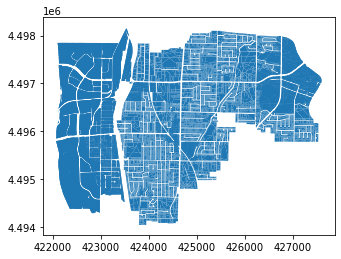

In [62]:
gdf_aggregated_converted.plot()

<AxesSubplot:>

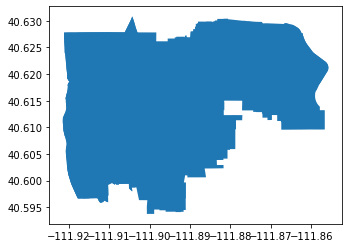

In [63]:
# Concatenar todos os GeoDataFrames filtrados em um único GeoDataFrame
all_gdf = pd.concat(filtered_gdfs, ignore_index=True)

all_gdf.plot()

# Exportar o GeoDataFrame único para um shapefile
#single_gdf.to_file('results/midvale-aggregated-polygons.shp', driver='ESRI Shapefile')


In [64]:
final_gdf = all_gdf[['layer','polygon_id','geometry']]
final_gdf = final_gdf.merge(df_scores, on=['layer','polygon_id'])
final_gdf

layer                  polygon_id  \
0                    CityCenters               Jordan Bluffs   
1                    CityCenters         Midvale Main Street   
2                    CityCenters            Bingham Junction   
3                    CityCenters                  Union Park   
4            NeighborhoodCenters      Midvale Center Station   
5            NeighborhoodCenters  Midvale Fort Union Station   
6  UtahQualifiedOpportunityZones               DESIGNATEDQOZ   
7                    Communities                     Midvale   

                                            geometry   CM        CU        CC  \
0  POLYGON ((-111.91989 40.60972, -111.91896 40.6...  0.0  0.000000  9.761435   
1  POLYGON ((-111.90821 40.60967, -111.90882 40.6...  0.0  0.000000  9.796753   
2  POLYGON ((-111.92124 40.60983, -111.92121 40.6...  0.0  0.000000  9.952360   
3  POLYGON ((-111.86676 40.62935, -111.86667 40.6...  0.0  0.000000  9.174845   
4  POLYGON ((-111.89087 40.61318, -111.89093 40.6...  0.0  0.000000  0.000000   
5  POLYGON ((-111.90106 40.62057, -111.89976 40.6...  0.0  0.000000  0.000000   
6  POLYGON ((-111.91310 40.59681, -111.91343 40.5...  0.0  0.000000  8.029171   
7  POLYGON ((-111.90299 40.62782, -111.89832 40.6...  0.0  0.000153  3.246998   

         CN        AA        AT        TT        TF         TA        AC  \
0  0.000000  9.138599  3.571967  3.564413  2.500000  10.000000  4.716195   
1  0.000000  9.214218  6.013150  6.911770  6.249781  10.000000  8.989000   
2  0.000000  9.114188  5.415827  6.281298  4.719192  10.000000  8.402012   
3  0.000000  9.113171  3.716241  4.385894  4.688863   9.991251  8.686938   
4  8.610471  9.548751  7.330598  9.516994  2.718492  10.000000  4.233340   
5  9.981609  9.762195  7.410632  9.981464  9.883661  10.000000  5.170231   
6  0.000000  9.153924  4.551787  5.346256  4.067022  10.000000  7.055647   
7  0.299165  9.305858  4.803041  5.497566  4.161064   9.182801  6.337544   

          AH        AE         AG        AP        AM   area_acres  
0   3.522255  2.777944   5.671832  0.000193  3.275376   249.113741  
1   5.672180  4.639125  10.000000  8.933266  2.500000    86.138760  
2   3.682478  1.227964   9.211403  1.306500  1.189660   403.215394  
3   1.076423  7.444278   9.933529  3.388543  2.467548   292.914896  
4   6.655690  6.966349   4.544183  1.809083  7.546093    64.353311  
5  10.000000  2.968098   5.016635  2.506285  2.500000    35.779937  
6   4.399017  2.766625   8.120329  1.627946  2.435973   905.147855  
7   5.020224  5.937966   7.069220  2.826894  3.533521  3072.370743

In [66]:
final_gdf = gpd.GeoDataFrame(final_gdf, geometry='geometry')
final_gdf = final_gdf.to_crs(epsg=32612)
final_gdf.to_file('results/midvale-aggregated-scores-by-areas.shp', driver='ESRI Shapefile')